In [1]:
import numpy as np
import pandas as pd

# Loads dataset from csv file
# Dataset retrieved from
df = pd.read_csv('star_classification.csv')
df = df.reindex(columns=['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','redshift','plate','MJD','class'])
df = df.drop(columns=['rerun_ID'])
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,171,0.634794,5812,56354,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,427,0.779136,10445,58158,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,299,0.644195,4576,55592,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,775,0.932346,9149,58039,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,842,0.116123,6121,56187,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,438,0.000000,9374,57749,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,866,0.404895,7626,56934,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,74,0.143366,2764,54535,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,470,0.455040,6751,56368,GALAXY


In [2]:
# Next, we need to convert the output from strings to numbers, or else it will not show up in the correlation matrix
df['class'].replace(['GALAXY', 'STAR', 'QSO'], [0, 1, 2], inplace=True)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,171,0.634794,5812,56354,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,427,0.779136,10445,58158,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,299,0.644195,4576,55592,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,775,0.932346,9149,58039,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,842,0.116123,6121,56187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,438,0.000000,9374,57749,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,866,0.404895,7626,56934,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,74,0.143366,2764,54535,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,470,0.455040,6751,56368,0


<AxesSubplot: >

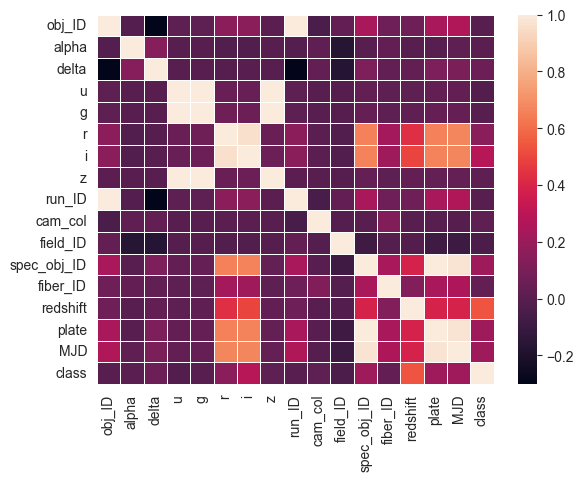

In [3]:
import seaborn as sns
# Exploratory Data Analysis
# Referenced seaborn correlation matrix tutorial: https://seaborn.pydata.org/examples/many_pairwise_correlations.html#
corr_matrix = df.corr()
sns.heatmap(corr_matrix, linewidths=.5)

# As we can see in the correlation matrix below, the feature that correlates the highest with the output is red shift.